In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

In [2]:

# OLD CODE TO READ RAW ACTIVITIES DATA FROM STRAVA
 
activities = pd.read_csv('1.csv', error_bad_lines=False, encoding='latin1')['Activity ID'] \
    .str.split(',', expand=True) \
    .rename(columns={0: 'Activity ID', 1: 'Date', 2: 'Year', 3: 'Time', 4: 'Activity Name', 5: 'Activity Type', 6: 'Activity Description', 7: 'Elapsed Time', 8: 'Distance', 9: 'Max Heart Rate', 18: 'Moving Time', 20:'Max Speed', 21: 'Average Speed', 22: 'Elevation Gain', 23: 'Elevation Loss', 31: 'Average Cadence', 36: 'Calories'})[['Activity ID', 'Date', 'Year', 'Time', 'Activity Name', 'Activity Type', 'Activity Description', 'Distance', 'Max Heart Rate', 'Moving Time', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Average Cadence', 'Calories']]

activities.Time = activities.Time.str[:-1]
activities['Month'] = activities.Date.apply(lambda x: str(x).split(' ')[0][1:])
activities['Day'] = activities.Date.apply(lambda x: str(x).split(' ')[-1])
activities.drop(columns=['Date'], inplace=True)
columns = list(activities.columns)
columns = columns[:1] + [columns[-1]] + [columns[-2]] + columns[1:-2]
activities = activities[columns]
activities = activities[activities['Month'].isin(['Nov', 'Oct', 'Apr', 'Aug', 'Mar', 'Jun', 'May', 'Jul', 'Sep', 'Dec', 'Jan', 'Feb'])]
activities['Year'] = activities['Year'].str.strip().astype(int)
activities['DateTime'] = pd.to_datetime(activities['Year'].astype(str) + '-' + activities['Month'] + '-' + activities['Day'].astype(str))
activities = activities[pd.to_numeric(activities['Distance'], errors='coerce').notnull()]

columns_to_convert = ['Distance', 'Moving Time', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Average Cadence', 'Calories']
for column in columns_to_convert:
    activities[column].replace('', float('nan'), inplace=True)
    activities[column] = activities[column].astype(float)

activities.drop(columns=['Day', 'Month', 'Year'], inplace=True)

activities.to_csv('activities2.csv', index=False)
activities.head() 


c:\Users\Oskar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Activity ID,Time,Activity Name,Activity Type,Activity Description,Distance,Max Heart Rate,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Average Cadence,Calories,DateTime
0,10392729929,12:45:04 PM,Afternoon Run,Run,"""""",8.57,,2269.0,5.213806,3.777677,56.623333,434.0,84.771606,589.0,2023-12-16
1,10401049506,9:46:47 AM,Morning Run,Run,"""""",21.03,,5409.0,14.587494,3.888767,153.846664,1400.0,85.495285,1394.0,2023-12-17
2,10401205979,1:07:15 PM,Afternoon Run,Run,"""""",14.54,,3600.0,5.602417,4.039150,64.540001,536.0,85.414284,999.0,2023-12-18
3,10401644825,8:55:20 PM,Night Run,Run,,1.54,,462.0,4.101818,3.344004,20.980000,65.0,84.561821,113.0,2023-12-18
4,10404526570,7:06:13 AM,Morning Run,Run,"""""",21.09,,5720.0,5.204004,3.688205,178.300003,724.0,84.764030,1453.0,2023-12-19


In [5]:
pd.read_csv('activities2.csv').head(50)

,Activity ID,Time,Activity Name,Activity Type,Activity Description,Distance,Max Heart Rate,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Average Cadence,Calories,DateTime
0,10392729929,12:45:04 PM,Afternoon Run,Run,"""""",8.57,NaN,2269.0,5.213806,3.777677,56.623333,434.0,84.771606,589.000000,2023-12-16
1,10401049506,9:46:47 AM,Morning Run,Run,"""""",21.03,NaN,5409.0,14.587494,3.888767,153.846664,1400.0,85.495285,1394.000000,2023-12-17
2,10401205979,1:07:15 PM,Afternoon Run,Run,"""""",14.54,NaN,3600.0,5.602417,4.039150,64.540001,536.0,85.414284,999.000000,2023-12-18
3,10401644825,8:55:20 PM,Night Run,Run,NaN,1.54,NaN,462.0,4.101818,3.344004,20.980000,65.0,84.561821,113.000000,2023-12-18
4,10404526570,7:06:13 AM,Morning Run,Run,"""""",21.09,NaN,5720.0,5.204004,3.688205,178.300003,724.0,84.764030,1453.000000,2023-12-19
5,10408653620,7:12:21 AM,Morning Run,Run,"""""",14.75,NaN,4141.0,5.461495,3.563535,58.419998,638.0,84.531441,1002.000000,2023-12-20
6,10419221870,8:30:00 AM,Morning Run,Run,"""""",26.00,NaN,6760.0,NaN,3.846154,NaN,NaN,NaN,2076.469238,2023-12-22
7,10420021617,4:50:05 PM,Afternoon Run,Run,"""""",8.77,NaN,2248.0,8.688324,3.903928,56.779999,405.0,84.455475,601.000000,2023-12-20
8,10420022188,10:10:22 AM,Lunch Run,Run,"""""",8.47,NaN,2837.0,4.104980,2.987388,56.720001,356.0,81.253349,585.000000,2023-12-21
9,10424622894,9:25:00 AM,Morning Run,Run,"""""",24.00,NaN,6000.0,NaN,4.000000,NaN,NaN,NaN,1916.740845,2023-12-23


In [ ]:
def select_data_by_date_range(df, start_date, end_date):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    selected_data = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]
    return selected_data

def plot_weekly_activities(df, viewing_options):
    plt.figure(figsize=(12, 5))
    df = df[df['Activity Type'] == 'Run']
    df.loc[:, 'DateTime'] = pd.to_datetime(df['DateTime'])
    df_distance = df.groupby(pd.Grouper(key='DateTime', freq='W-MON'))['Distance'].sum().reset_index()
    df_time = df.groupby(pd.Grouper(key='DateTime', freq='W-MON'))['Moving Time'].sum().reset_index()
    
    if 'kms' in viewing_options:
        plt.plot(df_distance['DateTime'], df_distance['Distance'], marker='o', linestyle='-', color='orange', label='Distance (kms)', markerfacecolor='white', markersize=10)
        plt.fill_between(df_distance['DateTime'], df_distance['Distance'], color='orange', alpha=0.2)
        plt.ylabel('Distance (kms)', fontsize=14)

    if 'time' in viewing_options:
        df_time['Moving Time'] = (df_time['Moving Time'] / 3600).round(1)
        plt.plot(df_time['DateTime'], df_time['Moving Time'], marker='o', linestyle='-', color='blue', label='Moving Time (hours)', markerfacecolor='white', markersize=10)
        plt.fill_between(df_time['DateTime'], df_time['Moving Time'], color='blue', alpha=0.2)
        plt.ylabel('Time (hours)', fontsize=14)

    if 'kms' in viewing_options and 'time' in viewing_options:
        plt.ylabel('Distance (kms) / Moving Time (hours)', fontsize=14)

    plt.title(str(df.iloc[0]['DateTime']).split(' ')[0] + ' - ' + str(df.iloc[-1]['DateTime']).split(' ')[0], fontsize=20)
    plt.xlabel('Date', fontsize=14)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


c:\Users\Oskar\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


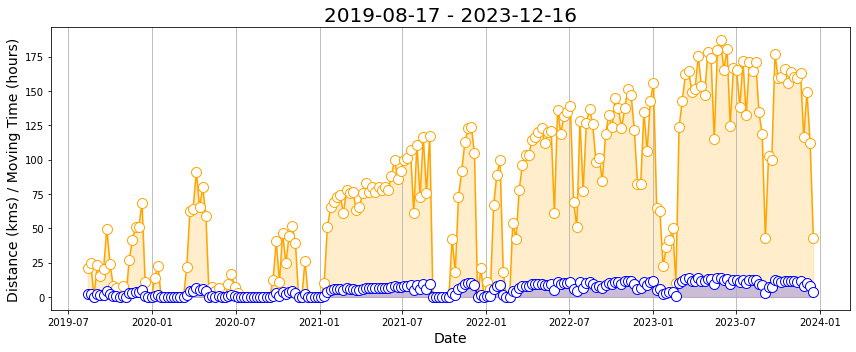

In [ ]:
# ['kms', 'time']

viewing_options = ['kms', 'time']

plot_weekly_activities(pd.read_csv('activities.csv'), viewing_options=viewing_options)